<a href="https://colab.research.google.com/github/Nakulpradeep94/Prudential_Insurance_Decisioning/blob/main/Prudential_Insurance_Decisioning(my_first_classification_project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Problem Statement</u></b>

### Picture this. You are a data scientist in a start-up culture with the potential to have a very large impact on the business. Oh, and you are backed up by a company with 140 years' business experience.

### Curious? Great! You are the kind of person we are looking for.

### Prudential, one of the largest issuers of life insurance in the USA, is hiring passionate data scientists to join a newly-formed Data Science group solving complex challenges and identifying opportunities. The results have been impressive so far but they want more. 

### In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

### The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

### By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry.

### The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling them to significantly streamline the process.

## <b>In this self project, you are required to do </b>

* ### Perform exploratory data analysis
* ### Build logistic regression, random forest, gradient boosted decision trees and xgboost models
* ### Evaluate the performance of the models using different set of metrics and prepare a final dataframe containing the train and test metrics for each of the models

## <b>Some of the guidelines for the project :</b>
* ### Describe in detail each of the experiments 
* ### Include plots and charts
* ### Draw the final conclusion on the basis of comparison of different models. 

# <b><u>Variable Description 

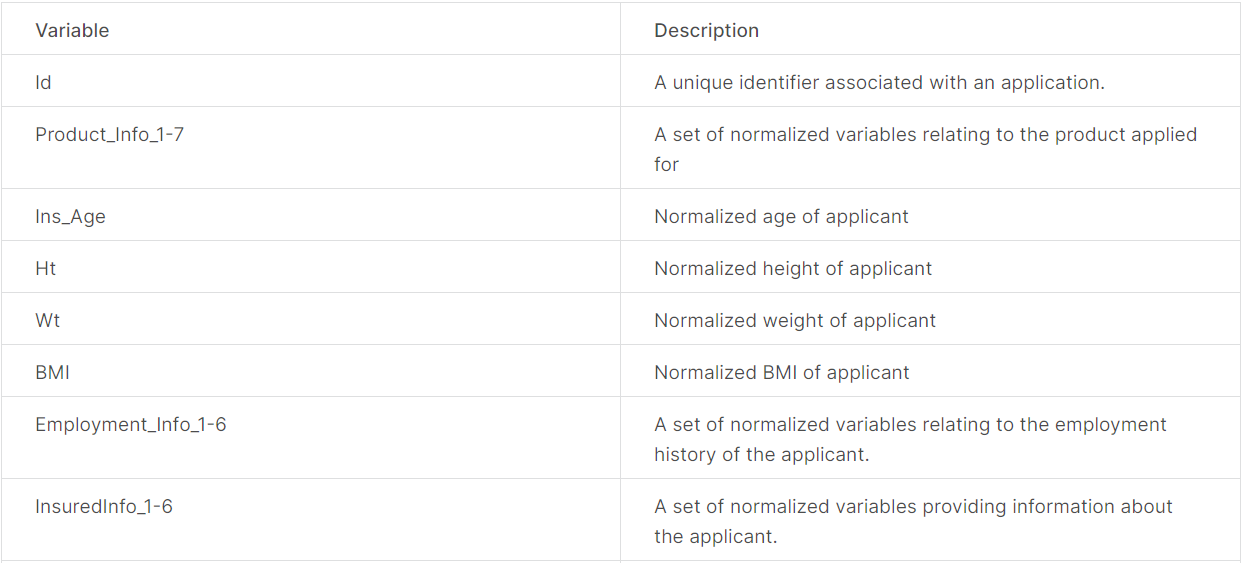

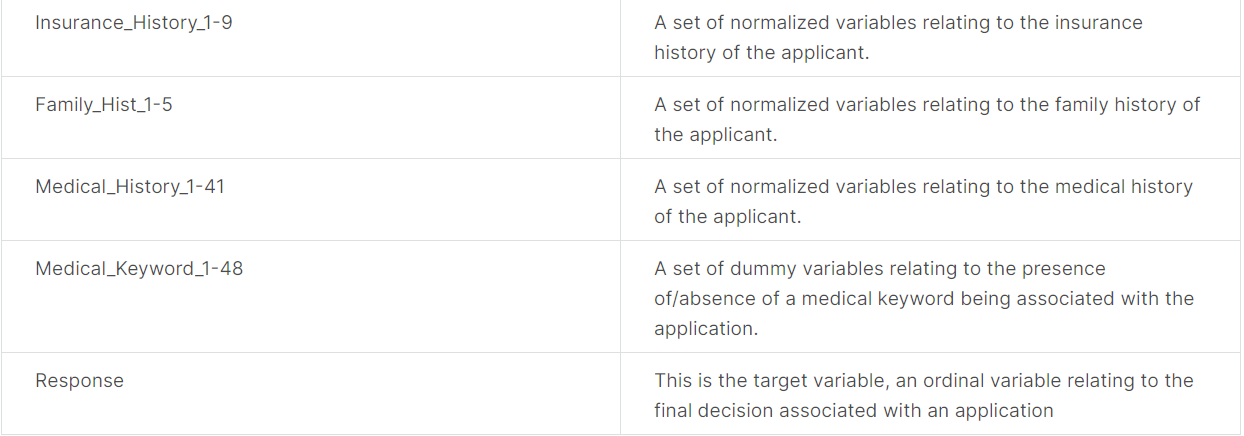

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder


### **Connected drive to read our data**..

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Reading the data**

In [ ]:
path='/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 3/Week 2/Day 6/dat/'
insurance_df=pd.read_csv(path + 'train.csv',index_col='Id')

In [ ]:
insurance_df=insurance_df.reset_index()
del insurance_df['Id']

In [ ]:
#First Look
insurance_df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [ ]:
insurance_df.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582,8.641821,1.300904,0.006283,2.142958,0.361469,1.209326,2.007427,5.835840,2.883666,1.027180,1.409188,1.038531,1.727606,1.055792,2.146983,1.958707,0.001733,1.901989,2.048484,2.419360,2.686230,0.474550,0.497737,0.444890,0.484635,7.962172,253.987100,2.102171,1.654873,...,0.036459,0.058015,0.010003,0.005962,0.007848,0.190465,0.012715,0.009161,0.007494,0.009296,0.008134,0.014601,0.037167,0.097775,0.018895,0.089456,0.013439,0.011856,0.014937,0.011755,0.025042,0.010896,0.021168,0.022836,0.020646,0.006938,0.010407,0.066587,0.006837,0.013658,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,0.122213,0.082347,4.227082,0.715034,0.032816,0.350033,0.349551,0.417939,0.085858,2.674536,0.320627,0.231566,0.491688,0.274915,0.445195,0.329328,0.989139,0.945739,0.007338,0.971223,0.755149,0.509577,0.483159,0.154959,0.140187,0.163012,0.129200,13.027697,178.621154,0.303098,0.475414,...,0.187432,0.233774,0.099515,0.076981,0.088239,0.392671,0.112040,0.095275,0.086244,0.095967,0.089821,0.119949,0.189172,0.297013,0.136155,0.285404,0.115145,0.108237,0.121304,0.107780,0.156253,0.103813,0.143947,0.149380,0.142198,0.083007,0.101485,0.249307,0.082405,0.116066,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00

In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 127 entries, Product_Info_1 to Response
dtypes: float64(18), int64(108), object(1)
memory usage: 57.5+ MB


### **Feature details as given in dataset** 

---
**The following variables are all categorical (nominal):**

Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41

**The following variables are continuous:**

Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5

**The following variables are discrete:**

Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32

**Medical_Keyword_1-48 are dummy variables.**

# **Exploratory Data Analysis(EDA)**

Let's first find which features has most missing value and if missing value is greater 40 percent we can remove that features from our dataset.

In [ ]:
missing_val_count_by_column = insurance_df.isnull().sum()/len(insurance_df)
print(missing_val_count_by_column[missing_val_count_by_column > 0.40].sort_values(ascending=False))

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64


In [ ]:
insurance_df = insurance_df.dropna(thresh=insurance_df.shape[0]*0.4,how='all',axis=1)

Columns has been deleted from our dataset,Now we have only columns that has less than 40 percent null values..

In [ ]:
insurance_df.head(2)

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,4.0,112,2,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,5.0,412,2,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 122 entries, Product_Info_1 to Response
dtypes: float64(13), int64(108), object(1)
memory usage: 55.3+ MB


Now we will check missing value for that features which has less than 40 and we will try to impute with some data..


*   If a categorical feature has missing values - if required will impute it with median
*   if a continous feature has missing values - if required will impute it with mean
*   if a discrete feature has missing values - we will impute it with most occurance valueforthat columns.



In [ ]:
insurance_df.isnull().sum()[insurance_df.isnull().sum() !=0]

Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4          19184
Medical_History_1       8889
dtype: int64

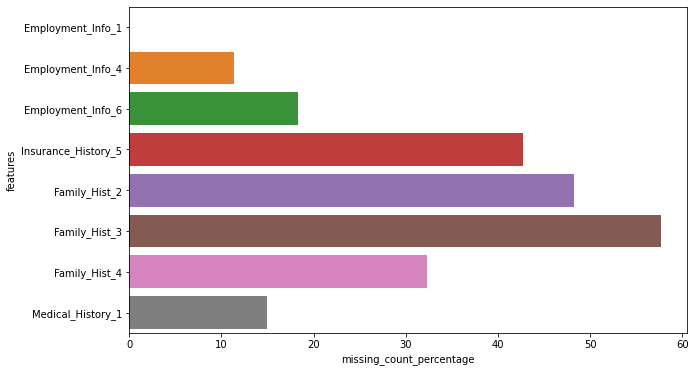

In [ ]:
# Lets draw a bar graph to visualize percentage of missing features in train set
missing= insurance_df.isnull().sum()[insurance_df.isnull().sum() !=0]
missing=pd.DataFrame(missing.reset_index())
missing.rename(columns={'index':'features',0:'missing_count'},inplace=True)
missing['missing_count_percentage']=((missing['missing_count'])/59381)*100
plt.figure(figsize=(10,6))
sns.barplot(y=missing['features'],x=missing['missing_count_percentage'])

#Looking at below bar grah- 
# Family_hist_3/2/4 and Insurance_hist_5  are top four features with huge amount of missing data ( imputaion to these might not be fruitful - I will drop these features)

Employment_Info_1_4_6 Insurance_History_5 Family_Hist_2_3_4 are continous features.
<br>The following variables are discrete: Medical_History_1.

* remove rows with missing values and see model performance
* impute missing values with mean and median or may be mode.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


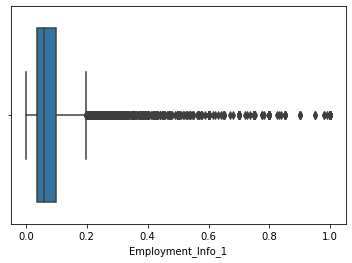

In [ ]:
plt.plot(figsize=(15,10))
sns.boxplot(insurance_df['Employment_Info_1'])

**Employment_Info_1 seems to have lots of outliers - Median should be right to impute missing values.**

In [ ]:
insurance_df['Employment_Info_1'].isna().sum()

19

In [ ]:
# imputing with Meadian , as there are lots of Outliers 
insurance_df['Employment_Info_1'] = insurance_df['Employment_Info_1'].fillna(insurance_df['Employment_Info_1'].median())  

In [ ]:
insurance_df['Employment_Info_1'].isna().sum()

0

In [ ]:
#Outlier Treatment -
insurance_df['Employment_Info_1'].describe()

count    59381.000000
mean         0.077576
std          0.082334
min          0.000000
25%          0.035000
50%          0.060000
75%          0.100000
max          1.000000
Name: Employment_Info_1, dtype: float64

In [ ]:
insurance_df['Employment_Info_4'].isna().sum()

6779

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


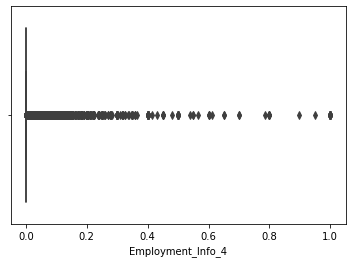

In [ ]:
plt.plot(figsize=(15,10))
sns.boxplot(insurance_df['Employment_Info_4'])
#Employment_Info_1 seems to have lots of outliers - Median should be right to impute missing values

In [ ]:
insurance_df['Employment_Info_4'] =insurance_df['Employment_Info_4'].fillna(insurance_df['Employment_Info_4'].median())

In [ ]:
insurance_df['Employment_Info_4'].isna().sum()

0

In [ ]:
insurance_df['Employment_Info_6'].isna().sum()

10854

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


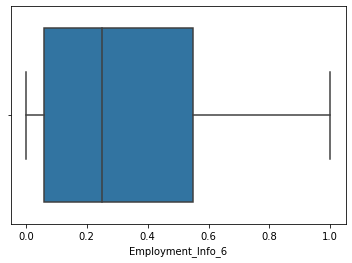

In [ ]:
plt.plot(figsize=(15,10))
sns.boxplot(insurance_df['Employment_Info_6'])
#No outlieers - mean should be rigth candidate to impute missing values

In [ ]:
insurance_df['Employment_Info_6']=insurance_df['Employment_Info_6'].fillna(insurance_df['Employment_Info_6'].mean())

In [ ]:
insurance_df['Employment_Info_6'].isna().sum()

0

In [ ]:

insurance_df['Medical_History_1'].isna().sum()

8889

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


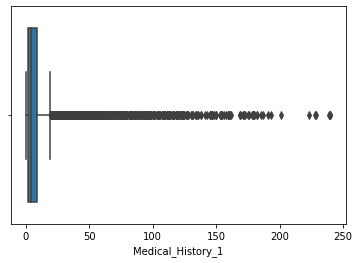

In [ ]:
y=insurance_df['Medical_History_1']
sns.boxplot(y)
#It's also have outlier median will be perfect.

In [ ]:
insurance_df['Medical_History_1']=insurance_df['Medical_History_1'].fillna(insurance_df['Medical_History_1'].median())

In [ ]:
insurance_df['Medical_History_1'].isna().sum()

0

### Family_Hist2/3 has highest number of missing value let's drop it.

In [ ]:
insurance_df=insurance_df.drop(['Family_Hist_3','Family_Hist_2'],axis=1)

In [ ]:
insurance_df['Family_Hist_4'].isna().sum()

19184

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


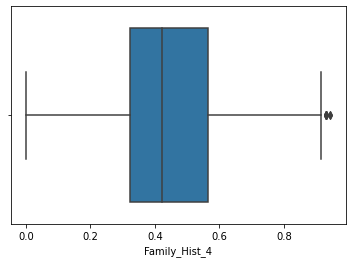

In [ ]:
plt.plot(figsize=(15,10))
sns.boxplot(insurance_df['Family_Hist_4'])
#Very less Outlier  - Median should be rigth candidate to impute missing values

In [ ]:
insurance_df['Family_Hist_4']=insurance_df['Family_Hist_4'].fillna(insurance_df['Medical_History_1'].median())

In [ ]:
insurance_df['Family_Hist_4'].isna().sum()

0

In [ ]:

insurance_df['Insurance_History_5'].isna().sum()

25396

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


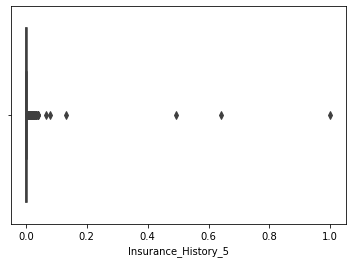

In [ ]:
plt.plot(figsize=(15,10))
sns.boxplot(insurance_df['Insurance_History_5'])
#It has Outlier  - Median should be rigth candidate to impute missing values

In [ ]:
insurance_df['Insurance_History_5'] = insurance_df['Insurance_History_5'].fillna(insurance_df['Medical_History_1'].median())

### **Let's check we have still any feature where we are getting missing value..**

In [ ]:
insurance_df.isnull().sum()[insurance_df.isnull().sum() !=0]
# We don't have any missing value now we can proceed with some advance analysis.

Series([], dtype: int64)

In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 120 entries, Product_Info_1 to Response
dtypes: float64(11), int64(108), object(1)
memory usage: 54.4+ MB


# **We have already deal with numerical value. Now let's deal with object variable..**

---
If we have any string type data we need to convert it into numeric type data..



In [ ]:
insurance_df['Product_Info_2'].unique()

array(['D3', 'A1', 'E1', 'D4', 'D2', 'A8', 'A2', 'D1', 'A7', 'A6', 'A3',
       'A5', 'C4', 'C1', 'B2', 'C3', 'C2', 'A4', 'B1'], dtype=object)

Text(0, 0.5, 'Count')

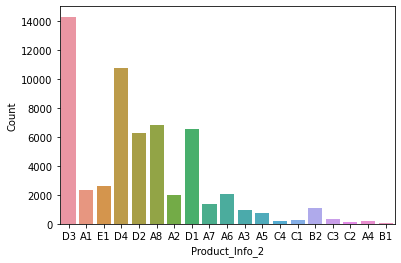

In [ ]:
#Drawing count plot
sns.countplot(x=insurance_df['Product_Info_2'])
plt.ylabel('Count')

In [ ]:
label=LabelEncoder()
insurance_df['Product_Info_2']=label.fit_transform(insurance_df['Product_Info_2'])

In [ ]:
insurance_df['Product_Info_2'].unique()

array([16,  0, 18, 17, 15,  7,  1, 14,  6,  5,  2,  4, 13, 10,  9, 12, 11,
        3,  8])

In [ ]:
insurance_df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.361469,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,4.000000,4.0,112,2,1,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.001800,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.084507,5.0,412,2,1,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.030000,1,2,8,3,1,1,1,2,1,1,3,4.000000,3,2,3,3,0.225352,10.0,3,2,2,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.200000,2,2,8,3,1,2,1,2,1,1,3,4.000000,3,2,3,3,0.352113,0.0,350,2,2,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.050000,1,2,6,3,1,2,1,2,1,1,3,4.000000,3,2,3,2,0.408451,4.0,162,2,2,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


## **Now Let's do analysis for our dependent variable --Response**

In [ ]:
insurance_df['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

Text(0, 0.5, 'Count')

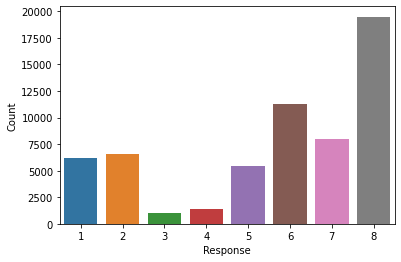

In [ ]:
sns.countplot(x=insurance_df['Response'])
plt.ylabel('Count')

## Converting dependent variable to a binary variable(Two possible label/classes)

---



In [ ]:
def modified_response(row):
  if ((row <=7) & (row>=0) ):
    val = 0
  elif (row==8):
    val = 1
  else:
    val = -1
  
  return val

In [ ]:
insurance_df['Modified_Response'] = insurance_df['Response'].apply(modified_response)

In [ ]:
insurance_df['Modified_Response'].value_counts()
#Now we have only two value for DV 0 and 1

0    39892
1    19489
Name: Modified_Response, dtype: int64

Text(0, 0.5, 'Count')

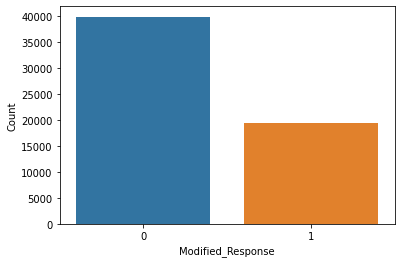

In [ ]:
#Let's draw countplot for these 2 DV
sns.countplot(x=insurance_df['Modified_Response'])
plt.ylabel('Count')

In [ ]:
# Now we can drop old response column coz we don't need that one anymore.
del insurance_df['Response']

In [ ]:
insurance_df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
0,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.361469,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,4.000000,4.0,112,2,1,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.001800,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.084507,5.0,412,2,1,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.030000,1,2,8,3,1,1,1,2,1,1,3,4.000000,3,2,3,3,0.225352,10.0,3,2,2,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.200000,2,2,8,3,1,2,1,2,1,1,3,4.000000,3,2,3,3,0.352113,0.0,350,2,2,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.050000,1,2,6,3,1,2,1,2,1,1,3,4.000000,3,2,3,2,0.408451,4.0,162,2,2,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
insurance_df.describe()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,12.505381,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077576,8.641821,1.300904,0.005565,2.142958,0.361469,1.209326,2.007427,5.835840,2.883666,1.027180,1.409188,1.038531,1.727606,1.055792,2.146983,1.958707,1.711707,1.901989,2.048484,2.419360,2.686230,1.593426,7.369057,253.987100,2.102171,1.654873,1.007359,2.889897,...,0.036459,0.058015,0.010003,0.005962,0.007848,0.190465,0.012715,0.009161,0.007494,0.009296,0.008134,0.014601,0.037167,0.097775,0.018895,0.089456,0.013439,0.011856,0.014937,0.011755,0.025042,0.010896,0.021168,0.022836,0.020646,0.006938,0.010407,0.066587,0.006837,0.013658,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,0.328203
std,0.160191,5.415902,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,0.122213,0.082334,4.227082,0.715034,0.030951,0.350033,0.315993,0.417939,0.085858,2.674536,0.320627,0.231566,0.491688,0.274915,0.445195,0.329328,0.989139,0.945739,1.978135,0.971223,0.755149,0.509577,0.483159,1.667954,12.095970,178.621154,0.303098,0.475414,0.085864,0.456128,...,0.187432,0.233774,0.099515,0.076981,0.088239,0.392671,0.112040,0.095275,0.086244,0.095967,0.089821,0.119949,0.189172,0.297013,0.136155,0.285404,0.115145,0.108237,0.121304,0.107780,0.156253,0.103813,0.143947,0.149380,0.142198,0.083007,0.101485,0.249307,0.082405,0.116066,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,0.469563
min,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0

In [ ]:
insurance_df.corr().abs()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
Product_Info_1,1.000000,0.021237,0.027573,0.059829,0.069720,0.078684,0.012169,0.077429,0.052720,0.004035,0.037130,0.047382,0.032271,0.039832,0.006482,0.018840,0.010990,0.041654,0.002911,0.002709,0.047523,0.013376,0.047975,0.011357,0.013058,0.007242,0.008187,0.015076,0.008454,0.006753,0.012547,0.008191,0.001294,0.048332,0.016873,0.005200,0.017654,0.022528,0.005489,0.008830,...,0.002277,0.010436,0.004590,0.001816,0.000856,0.036699,0.002719,0.000372,0.008864,0.007173,0.004998,0.007143,0.001019,0.055918,0.001985,0.018417,0.004536,0.005395,0.004660,0.008189,0.008202,0.008154,0.002827,0.006149,0.001988,0.003620,0.004441,0.007081,0.007272,0.002378,0.002782,0.004495,0.007697,0.014055,0.008247,0.006719,0.010638,0.004402,0.008469,0.019621
Product_Info_2,0.021237,1.000000,0.006030,0.243367,0.017446,0.001259,0.038280,0.043105,0.136062,0.093103,0.028379,0.067997,0.074509,0.088480,0.017470,0.022414,0.012580,0.103423,0.003617,0.034519,0.043330,0.007041,0.125216,0.008984,0.023395,0.033752,0.010437,0.004328,0.010634,0.055179,0.014515,0.003863,0.039179,0.058379,0.021765,0.023564,0.294846,0.073168,0.004858,0.026258,...,0.001081,0.009630,0.001681,0.001014,0.001533,0.022037,0.004012,0.003690,0.000761,0.005767,0.002974,0.004688,0.003655,0.047894,0.015803,0.013396,0.008472,0.021138,0.002032,0.006686,0.006000,0.002845,0.002046,0.006022,0.002047,0.001282,0.005260,0.001575,0.010384,0.009963,0.023960,0.006149,0.004466,0.008471,0.004608,0.008773,0.014057,0.000075,0.027022,0.010644
Product_Info_3,0.027573,0.006030,1.000000,0.048775,0.025419,0.018855,0.015581,0.001005,0.293546,0.213546,0.083288,0.151419,0.191771,0.241939,0.026998,0.764707,0.004456,0.033652,0.019398,0.004991,0.056197,0.026939,0.398228,0.029694,0.009949,0.010795,0.033448,0.022591,0.033717,0.038518,0.038793,0.032734,0.020843,0.003713,0.005485,0.033661,0.041289,0.090907,0.004510,0.045986,...,0.003771,0.007156,0.006308,0.010818,0.000538,0.027053,0.005535,0.030666,0.002734,0.002748,0.006718,0.001512,0.006785,0.055625,0.038076,0.026242,0.006381,0.016673,0.006696,0.032222,0.073598,0.008732,0.016893,0.007742,0.015632,0.004309,0.013350,0.011072,0.028331,0.046710,0.039359,0.000005,0.036560,0.034787,0.002696,0.053305,0.001538,0.017001,0.045862,0.094939
Product_Info_4,0.059829,0.243367,0.048775,1.000000,0.040433,0.089075,0.051542,0.261356,0.141780,0.028041,0.129369,0.350921,0.140759,0.178712,0.041446,0.077297,0.212881,0.060936,0.007285,0.016754,0.073148,0.006923,0.138304,0.022624,0.049299,0.001138,0.008779,0.026183,0.008924,0.015907,0.054368,0.013226,0.032182,0.219754,0.046398,0.006367,0.147716,0.050651,0.001112,0.031083,...,0.043202,0.0105

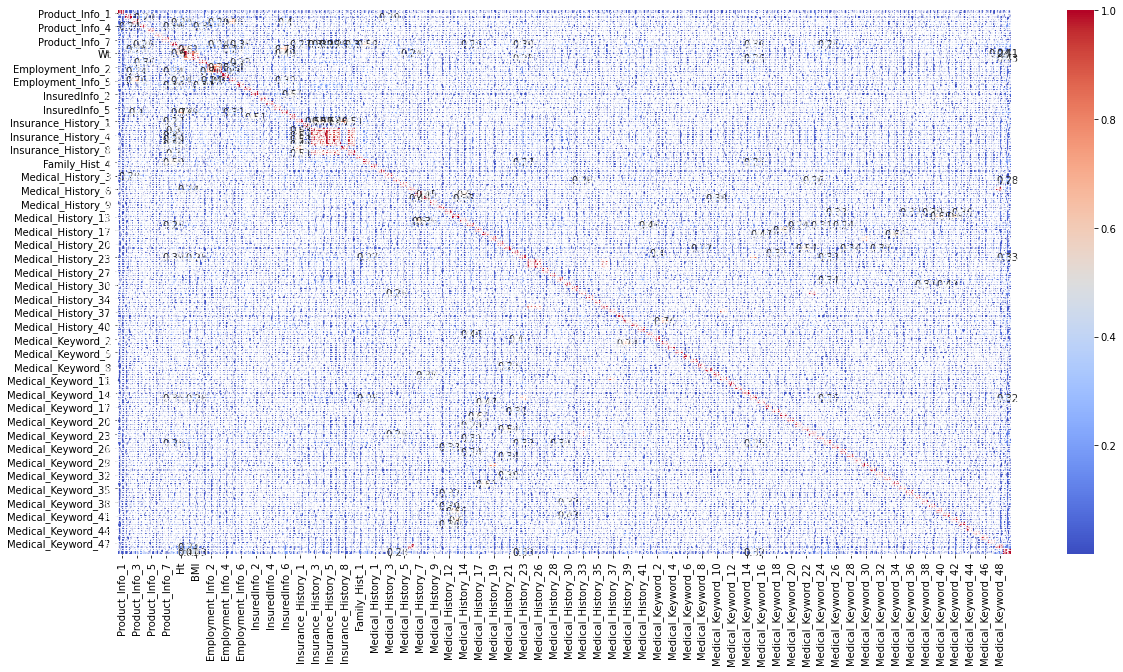

In [ ]:
# Correlation
plt.figure(figsize=(20,10))
correlation = insurance_df.corr().abs()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# **Start building baseline models**

---
* Logistic Regression
* Random Forest
* Gradient Boosted 
* Decision Trees 
* XGBoost Models


In [ ]:
insurance_df.columns

Index(['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht',
       'Wt',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Modified_Response'],
      dtype='object', length=120)

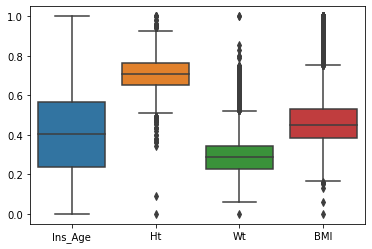

In [ ]:
# Exploring Numerical variables
misc_cols=["Ins_Age","Ht","Wt","BMI"]

sns.boxplot(data=insurance_df[misc_cols])

Except Ins_Age all of them have Outliers..

### **We have some outlier for above column list's try to remove it..**

In [ ]:
def remove_outlier(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    df_out = df.loc[(df[col_name] > low) & (df[col_name] < high)]
    return df_out

In [ ]:
dev=remove_outlier(insurance_df,'BMI')
dev=remove_outlier(dev,'Wt')
insurance_df=remove_outlier(dev,'Ht')

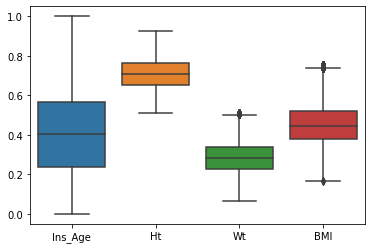

In [ ]:
# Exploring Numerical variables
misc_cols=["Ins_Age","Ht","Wt","BMI"]

sns.boxplot(data=insurance_df[misc_cols])

In [ ]:
# Data for all the independent variables
X = insurance_df.drop(labels='Modified_Response',axis=1)

# Data for the dependent variable
y = insurance_df['Modified_Response']

In [ ]:
X.shape, y.shape

((57348, 119), (57348,))

## **Spliting the data into train test Data**

In [ ]:
# Train-Test Split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [ ]:
#Check the shape of train data
print('Shape of X_train and y_train:',X_train.shape,y_train.shape)

#Check the shape of test data
print('Shape of X_test and y_test:', X_test.shape,y_test.shape)

Shape of X_train and y_train: (43011, 119) (43011,)
Shape of X_test and y_test: (14337, 119) (14337,)


# **Training all type classifier and regression and predicting the test set**

**Importing important library...**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

### **Note:**<br>

---
 

Below is the code where we have initiallized all type of classfier and predicting the test and train set .
<br>Also have a function which calculate the eveluation matrix for all the type of classifier.

In [ ]:
#declare the models
lr_model=LogisticRegression(C=0.01,penalty='l2',max_iter=200,solver='newton-cg')
dt_model=DecisionTreeClassifier()
rf_model=RandomForestClassifier()
gbc_model=GradientBoostingClassifier()
xgb_model=XGBClassifier()

#create a list of models
models=[lr_model,dt_model,rf_model,gbc_model,xgb_model]

#creating dictionay for storing the confustion matix
dct_train={}
dct_test={}
lst_imp=[]
# fuction for calculation the eveluation matrix
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #read model one by one
    for model in models:
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        y_pred_train=model.predict(X_train)
        
        #compute metrics
        train_accuracy=accuracy_score(y_train,y_pred_train)
        test_accuracy=accuracy_score(y_test,y_pred)
        p_score_train=precision_score(y_train,y_pred_train)
        p_score=precision_score(y_test,y_pred)
        r_score_train=recall_score(y_train,y_pred_train)
        r_score=recall_score(y_test,y_pred)
        train_auc = roc_auc_score(y_train,y_pred_train)
        test_auc = roc_auc_score(y_test,y_pred)
        fp, tp, th = roc_curve(y_test, y_pred)
        
        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Train_Accuracy"]=round(train_accuracy,2)
        df.loc[i,"Test_Accuracy"]=round(test_accuracy,2)
        df.loc[i,"Precision_Train"]=round(p_score_train,2)
        df.loc[i,"Precision_Test"]=round(p_score,2)
        df.loc[i,"Recall_Train"]=round(r_score_train,2)
        df.loc[i,"Recall_test"]=round(r_score,2)
        df.loc[i,"ROC_AUC_Train"]=round(train_auc,2)
        df.loc[i,"ROC_AUC_Test"]=round(test_auc,2)
        df.loc[i,'AUC'] = auc(fp, tp)
        #inserted in dictionary
        dct_train[model.__class__.__name__]=confusion_matrix(y_train,y_pred_train)
        dct_test[model.__class__.__name__]=confusion_matrix(y_test,y_pred)

        i+=1
    # Return the data frame and dictionary
    return df,dct_train,dct_test

In [ ]:
result_df,dct_train,dct_test=score_model(X_train,y_train,X_test,y_test)

## **Printing the Evaluation Matrix**

---



In [ ]:
result_df

,Model_Name,Train_Accuracy,Test_Accuracy,Precision_Train,Precision_Test,Recall_Train,Recall_test,ROC_AUC_Train,ROC_AUC_Test,AUC
0,LogisticRegression,0.80,0.80,0.72,0.72,0.65,0.65,0.76,0.76,0.760827
1,DecisionTreeClassifier,1.00,0.75,1.00,0.63,1.00,0.64,1.00,0.73,0.726357
2,RandomForestClassifier,1.00,0.82,1.00,0.74,1.00,0.71,1.00,0.79,0.791171
3,GradientBoostingClassifier,0.82,0.82,0.73,0.72,0.75,0.75,0.81,0.80,0.803607
4,XGBClassifier,0.82,0.82,0.73,0.72,0.76,0.76,0.80,0.80,0.802843


## Printing the Confusion matrix for train and test data set for all model....

---



**Train dataset**

In [ ]:
for key,value in dct_train.items():
  print(f'for {key} Confusion matrix is :{value}

for LogisticRegression Confusion matrix is :[[24734  3647]
 [ 5138  9492]]
for DecisionTreeClassifier Confusion matrix is :[[28381     0]
 [    0 14630]]
for RandomForestClassifier Confusion matrix is :[[28381     0]
 [    0 14630]]
for GradientBoostingClassifier Confusion matrix is :[[24388  3993]
 [ 3627 11003]]
for XGBClassifier Confusion matrix is :[[24222  4159]
 [ 3583 11047]]


**Test dataset**

In [ ]:
for key,value in dct_test.items():
  print(f'for {key} Confusion matrix is :{value}')

for LogisticRegression Confusion matrix is :[[8247 1254]
 [1675 3161]]
for DecisionTreeClassifier Confusion matrix is :[[7704 1797]
 [1732 3104]]
for RandomForestClassifier Confusion matrix is :[[8301 1200]
 [1409 3427]]
for GradientBoostingClassifier Confusion matrix is :[[8111 1390]
 [1192 3644]]
for XGBClassifier Confusion matrix is :[[8067 1434]
 [1177 3659]]


# **Features Importance Graph..**

### **For Random Forest.**

In [ ]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
y_pred_train=rf_model.predict(X_train)

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

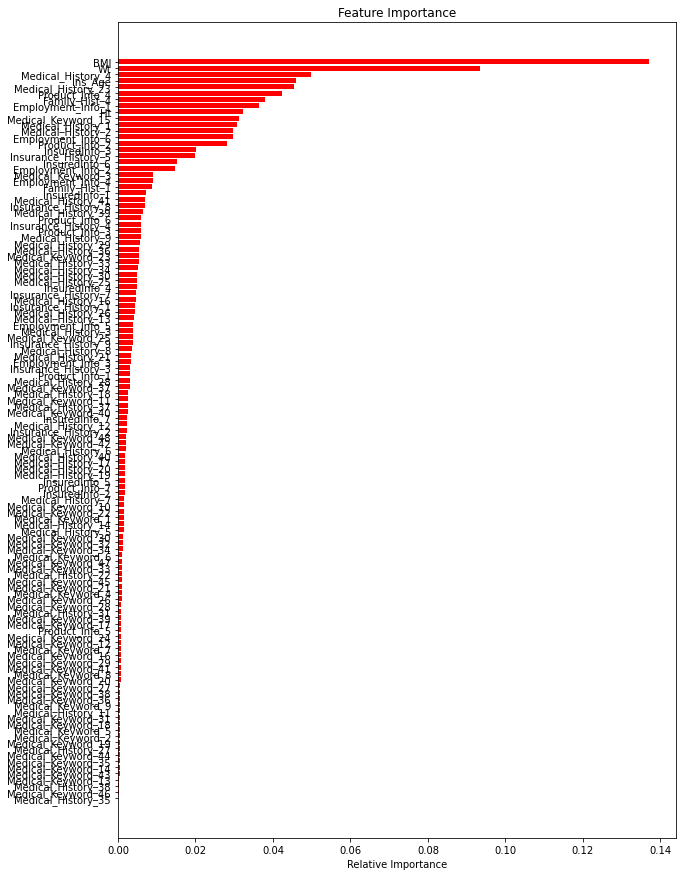

In [ ]:
plt.figure(figsize=(10,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**If we add all the features importance value it will give 1..**

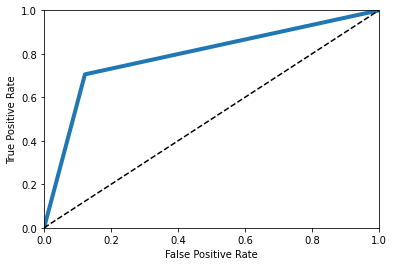

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=4,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr,tpr)
plt.show()

# plot precision vs recall


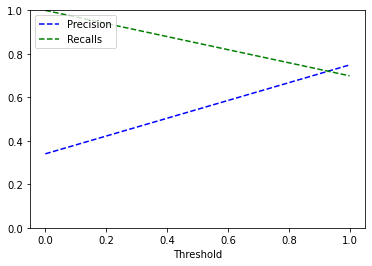

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

y_scores=cross_val_predict(rf_model,X_train,y_train,cv=3)

precisions,recalls,thresholds=precision_recall_curve(y_train,y_scores)

def plot_precision_recall_vs_threshold(precisions,recalls,threshold):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g--",label="Recalls")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

## **For XGBoost**

In [ ]:
xgb_model=RandomForestClassifier()
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
y_pred_train=xgb_model.predict(X_train)

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

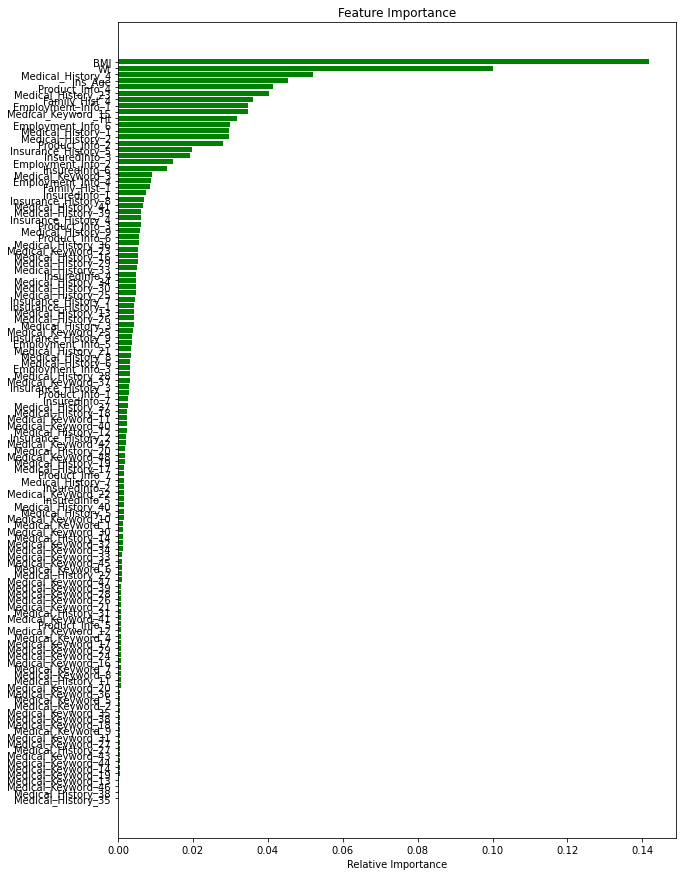

In [ ]:
plt.figure(figsize=(10,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Feature Importance graph  is same for all the classifier...

In [ ]:
result_df

,Model_Name,Train_Accuracy,Test_Accuracy,Precision_Train,Precision_Test,Recall_Train,Recall_test,ROC_AUC_Train,ROC_AUC_Test,AUC
0,LogisticRegression,0.80,0.80,0.72,0.72,0.65,0.65,0.76,0.76,0.760827
1,DecisionTreeClassifier,1.00,0.75,1.00,0.63,1.00,0.64,1.00,0.73,0.726357
2,RandomForestClassifier,1.00,0.82,1.00,0.74,1.00,0.71,1.00,0.79,0.791171
3,GradientBoostingClassifier,0.82,0.82,0.73,0.72,0.75,0.75,0.81,0.80,0.803607
4,XGBClassifier,0.82,0.82,0.73,0.72,0.76,0.76,0.80,0.80,0.802843


**FYI**:

---
Main reason I havn't used any hyperparameter to tune our model because it's taking too much time to run,for some classifier it's taking more than 1 hour.Therefore,I have made simple model for all the mentioned model in question.
<br>But I know the concept of hyperparameter,and also know how can we use it and what significance for that hyperparameter...

# **Conclusion**

---
From above we can conclude that below point
* GradientBoostingClassifier has highest Test Accuracy.
* RandomForestClassifier	has highest Test Precision score .
* XGBClassifier has highest Test recall score.
* GradientBoostingClassifier and XGBClassifier have same Roc_auc_score.
* GradientBoostingClassifie has highest AUC score.

So, Inshort we can say that XGBClassifier is most efficient classifier/Reression to use for this given datset.
<br> XGBClassifier best model in given all the given model.


# **Thanks :)**